### <center>Predict Loan Eligibility for Dream Housing Finance company</center>

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### Data Dictionary:

Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

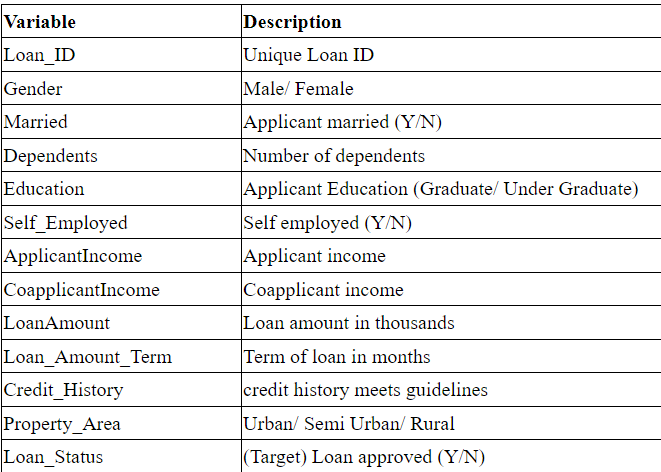

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

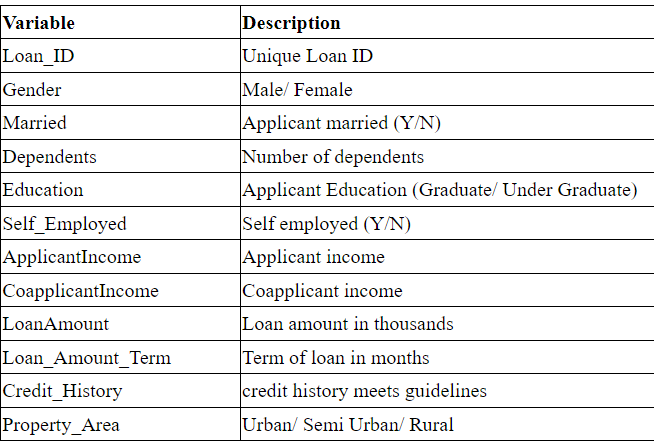

In [149]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

In [150]:
# read the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [151]:
# check dimensions of the data
print("train data:", train.shape)
print('test data:', test.shape)

train data: (614, 13)
test data: (367, 12)


In [152]:
# first 5 records
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [154]:
# check datatypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [155]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [156]:
# descriptive statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [157]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [158]:
# data summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


First we will drop the Loan_ID column as it is not necessary for our analysis.

In [160]:
train = train.drop(['Loan_ID'], axis=1)
test = test.drop(['Loan_ID'], axis=1)

In [161]:
# check for null/missing values
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
# convert Credit_History, Loan_Amount_Term to object datatype
# train = train.astype({"Credit_History":"str", "Loan_Amount_Term":"str"})
# test = test.astype({"Credit_History":"str", "Loan_Amount_Term":"str"})

In [163]:
# create an instance for object imputer & numeric imputer
imputer_object = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_numeric = SimpleImputer(missing_values=np.nan, strategy='median')

In [164]:
# object columns
object_cols = ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]

In [165]:
# select data from train
object_data = train[object_cols]

In [166]:
# apply object imputer
object_data = imputer_object.fit_transform(object_data)

In [167]:
# apply numeric imputer
train['LoanAmount'] = imputer_numeric.fit_transform(train[['LoanAmount']])

In [168]:
# drop unnecessary columns
train = train.drop(object_cols, axis=1)

In [169]:
# create dataframe
object_data = pd.DataFrame(object_data,columns=["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"])

In [170]:
# check records present in data
object_data.head()

,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History
0,Male,No,0,No,360.0,1.0
1,Male,Yes,1,No,360.0,1.0
2,Male,Yes,0,Yes,360.0,1.0
3,Male,Yes,0,No,360.0,1.0
4,Male,No,0,No,360.0,1.0


In [171]:
# training data
training_data = pd.concat([train, object_data], axis=1)

In [172]:
# check for null/missing values
training_data.isnull().sum()

Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
Gender               0
Married              0
Dependents           0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [173]:
# check for duplicated records
training_data.duplicated().sum()

0

In [196]:
training_data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History
0,Graduate,5849,0.0,128.0,Urban,Y,Male,No,0,No,360.0,1.0
1,Graduate,4583,1508.0,128.0,Rural,N,Male,Yes,1,No,360.0,1.0
2,Graduate,3000,0.0,66.0,Urban,Y,Male,Yes,0,Yes,360.0,1.0
3,Not Graduate,2583,2358.0,120.0,Urban,Y,Male,Yes,0,No,360.0,1.0
4,Graduate,6000,0.0,141.0,Urban,Y,Male,No,0,No,360.0,1.0


In [197]:
# concise summary
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Property_Area      614 non-null    object 
 5   Loan_Status        614 non-null    object 
 6   Gender             614 non-null    object 
 7   Married            614 non-null    object 
 8   Dependents         614 non-null    object 
 9   Self_Employed      614 non-null    object 
 10  Loan_Amount_Term   614 non-null    object 
 11  Credit_History     614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


In [175]:
# check for null/missing values
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [176]:
# object columns in test data
object_cols_test = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

In [177]:
# select data from test
object_cols_test = test[object_cols_test]

In [178]:
# check records in data
object_cols_test

,Gender,Dependents,Self_Employed,Credit_History,Loan_Amount_Term
0,Male,0,No,1.0,360.0
1,Male,1,No,1.0,360.0
2,Male,2,No,1.0,360.0
3,Male,2,No,NaN,360.0
4,Male,0,No,1.0,360.0
...,...,...,...,...,...
362,Male,3+,Yes,1.0,360.0
363,Male,0,No,1.0,360.0
364,Male,0,No,NaN,360.0
365,Male,0,No,1.0,360.0


In [179]:
# apply object imputer
object_cols_test = imputer_object.fit_transform(object_cols_test)

In [181]:
# create dataframe
object_cols_test = pd.DataFrame(object_cols_test, columns=['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term'])

# check records in the data
object_cols_test

,Gender,Dependents,Self_Employed,Credit_History,Loan_Amount_Term
0,Male,0,No,1.0,360.0
1,Male,1,No,1.0,360.0
2,Male,2,No,1.0,360.0
3,Male,2,No,1.0,360.0
4,Male,0,No,1.0,360.0
...,...,...,...,...,...
362,Male,3+,Yes,1.0,360.0
363,Male,0,No,1.0,360.0
364,Male,0,No,1.0,360.0
365,Male,0,No,1.0,360.0


In [182]:
# drop unnecessary columns
test = test.drop(object_cols_test, axis=1)
test

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
0,Yes,Graduate,5720,0,110.0,Urban
1,Yes,Graduate,3076,1500,126.0,Urban
2,Yes,Graduate,5000,1800,208.0,Urban
3,Yes,Graduate,2340,2546,100.0,Urban
4,No,Not Graduate,3276,0,78.0,Urban
...,...,...,...,...,...,...
362,Yes,Not Graduate,4009,1777,113.0,Urban
363,Yes,Graduate,4158,709,115.0,Urban
364,No,Graduate,3250,1993,126.0,Semiurban
365,Yes,Graduate,5000,2393,158.0,Rural


In [183]:
# apply numeric imputer
test['LoanAmount'] = imputer_numeric.fit_transform(test[['LoanAmount']])

In [184]:
# testing data
testing_data = pd.concat([test, object_cols_test], axis=1)

In [185]:
# check for null/missing values
testing_data.isnull().sum()

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Gender               0
Dependents           0
Self_Employed        0
Credit_History       0
Loan_Amount_Term     0
dtype: int64

In [192]:
# check for duplicate records
testing_data.duplicated().sum()

0

In [191]:
# drop duplicates
testing_data = testing_data.drop_duplicates()

In [194]:
# check for duplicate records
testing_data.duplicated().sum()

0

In [199]:
testing_data.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Gender,Dependents,Self_Employed,Credit_History,Loan_Amount_Term
0,Yes,Graduate,5720,0,110.0,Urban,Male,0,No,1.0,360.0
1,Yes,Graduate,3076,1500,126.0,Urban,Male,1,No,1.0,360.0
2,Yes,Graduate,5000,1800,208.0,Urban,Male,2,No,1.0,360.0
3,Yes,Graduate,2340,2546,100.0,Urban,Male,2,No,1.0,360.0
4,No,Not Graduate,3276,0,78.0,Urban,Male,0,No,1.0,360.0


In [200]:
# concise summary
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            366 non-null    object 
 1   Education          366 non-null    object 
 2   ApplicantIncome    366 non-null    int64  
 3   CoapplicantIncome  366 non-null    int64  
 4   LoanAmount         366 non-null    float64
 5   Property_Area      366 non-null    object 
 6   Gender             366 non-null    object 
 7   Dependents         366 non-null    object 
 8   Self_Employed      366 non-null    object 
 9   Credit_History     366 non-null    object 
 10  Loan_Amount_Term   366 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 34.3+ KB


#### Data Visualization